In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
file_path = '/Users/saiganeshreddykodekandla/Documents/projects/circuitTechnologies/circuitTechnologiesAmazon/csv_files/MainFileCleanedAmazon.csv'  # Update with your actual file path
data = pd.read_csv(file_path)


In [3]:
data.head()

,Product_URL,Product_Title,Brand,Price,Rating,Rating_Count,Best_Seller_Rank_Home_Improvement,Best_Seller_Rank_Home_Security
0,https://amazon.in/sspa/click?ie=UTF8&spc=MTo2O...,Mygate Smart Lock SE | 6-Ways to Unlock | Fing...,Mygate,8450.0,0.0,122,553100,2.0
1,https://amazon.in/sspa/click?ie=UTF8&spc=MTo2O...,QUBO Smart Door Lock Select from Hero Group | ...,Qubo,15990.0,4.4,1082,1716100,11.0
2,https://amazon.in/sspa/click?ie=UTF8&spc=MTo2O...,QUBO Smart Door Lock Essential from Hero Group...,Qubo,9490.0,0.0,1472,1218100,5.0
3,https://amazon.in/sspa/click?ie=UTF8&spc=MTo2O...,Godrej Digital Lock I Catus Connect I Smart Lo...,Godrej Locking Solutions and Systems,13340.0,0.0,593,1397100,8.0
4,https://amazon.in/nandati-Invisible-Specially-...,nandati Invisible or Hidden RFID Smart Digital...,nandati,3133.0,0.0,0,183935100,477.0


In [4]:
# Count the number of unique brands
num_brands = data['Brand'].nunique()
print(f'Number of unique brands: {num_brands}')


Number of unique brands: 110


In [5]:
# Count SKUs per brand
sku_count_per_brand = data['Brand'].value_counts()
print(sku_count_per_brand)


Brand
0                                       22
Golens                                  19
LAVNA                                   16
Godrej Locking Solutions and Systems    15
Escozor                                 15
                                        ..
XP Smart                                 1
iuknob                                   1
Mukhivala                                1
HEIXSMT                                  1
Elara                                    1
Name: count, Length: 110, dtype: int64


In [6]:
# Calculate average rankings for each brand
data['Average_Best_Seller_Rank'] = data[['Best_Seller_Rank_Home_Improvement', 'Best_Seller_Rank_Home_Security']].mean(axis=1)

# Group by Brand and calculate the average ranking
brand_rankings = data.groupby('Brand')['Average_Best_Seller_Rank'].mean().reset_index()
brand_rankings['Relative_Rank'] = brand_rankings['Average_Best_Seller_Rank'].rank(ascending=True)
print(brand_rankings)


               Brand  Average_Best_Seller_Rank  Relative_Rank
0                  0              2.126906e+07           77.0
1    A2Z SMART LOCKS              3.639208e+07           85.0
2     ABEZ- be smart              6.602134e+07          100.0
3             ALCOTT              1.442410e+07           68.0
4          ALLYWASAI              4.470979e+07           91.0
..               ...                       ...            ...
105           iuknob              1.823337e+08          110.0
106            jenix              0.000000e+00           23.5
107          nandati              9.196779e+07          105.0
108            overa              0.000000e+00           23.5
109         samtechT              0.000000e+00           23.5

[110 rows x 3 columns]


In [7]:
# Calculate average rating per brand
brand_ratings = data.groupby('Brand')['Rating'].mean().reset_index()
brand_ratings.columns = ['Brand', 'Average_Rating']
print(brand_ratings)


               Brand  Average_Rating
0                  0        0.377273
1    A2Z SMART LOCKS        0.000000
2     ABEZ- be smart        0.000000
3             ALCOTT        0.000000
4          ALLYWASAI        0.000000
..               ...             ...
105           iuknob        0.000000
106            jenix        0.000000
107          nandati        0.000000
108            overa        0.000000
109         samtechT        0.000000

[110 rows x 2 columns]


In [8]:
# Define price bands
bins = [0, 3000, 5000, 10000, 15000, 20000, float('inf')]
labels = ['<INR 3000', 'INR 3000-4999', 'INR 5000-9999', 'INR 10000-14999', 'INR 15000-19999', 'Greater than 20000']

# Create a new column for price bands
data['Price_Band'] = pd.cut(data['Price'], bins=bins, labels=labels, right=False)

# Count SKUs per price band
price_distribution = data['Price_Band'].value_counts().sort_index()
print(price_distribution)


Price_Band
<INR 3000             75
INR 3000-4999         33
INR 5000-9999         81
INR 10000-14999       53
INR 15000-19999       28
Greater than 20000    26
Name: count, dtype: int64


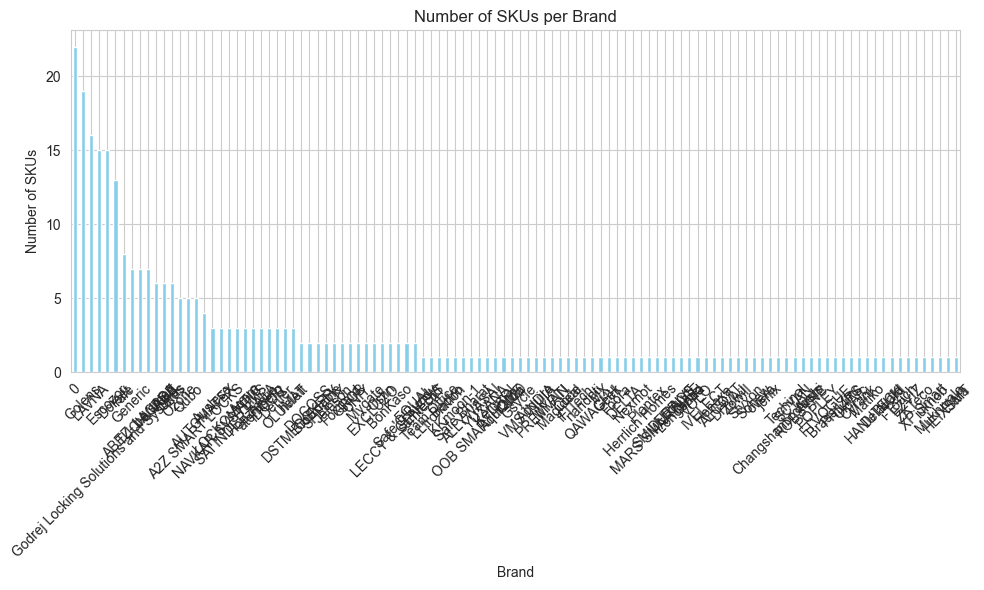

/var/folders/vc/2k_dz51d5s19ylhdt4k80hpw0000gn/T/ipykernel_9286/809703400.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=brand_rankings.sort_values('Relative_Rank'), x='Brand', y='Relative_Rank', color='skyblue', ci=None)


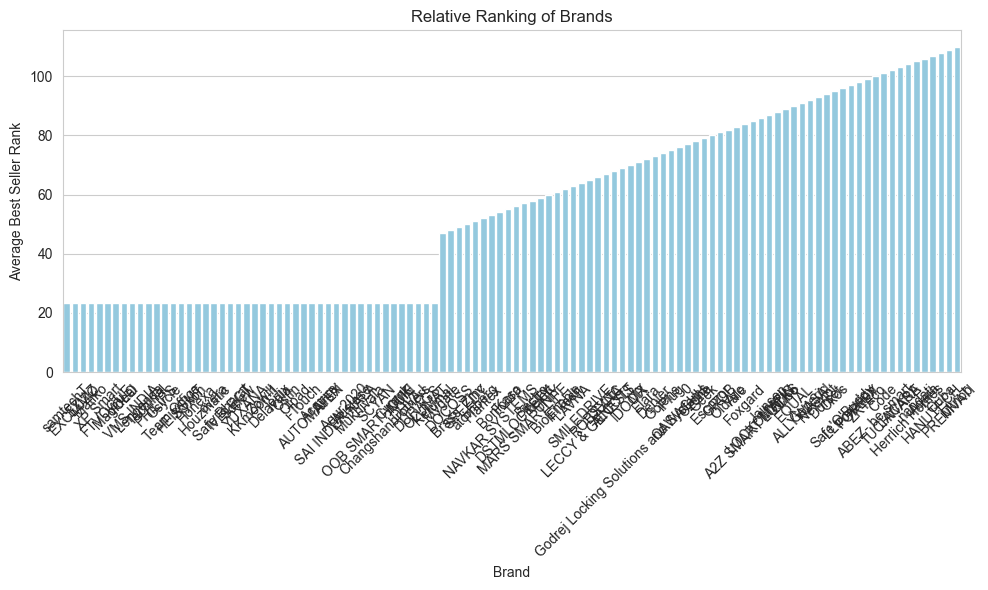

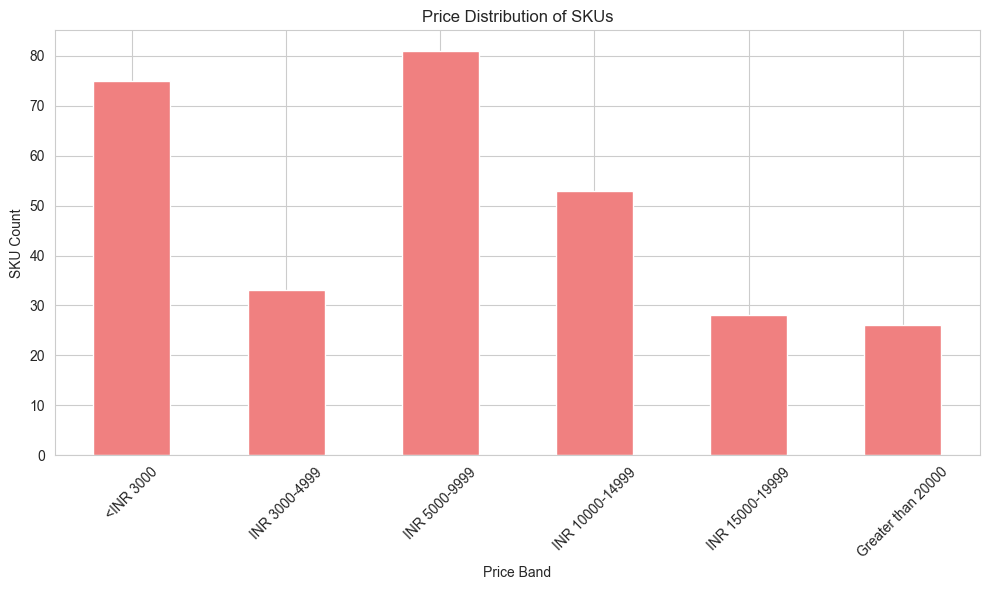

In [13]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the number of SKUs per brand
plt.figure(figsize=(10, 6))
sku_count_per_brand.plot(kind='bar', color='skyblue')
plt.title('Number of SKUs per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of SKUs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the average ranking of brands
plt.figure(figsize=(10, 6))
sns.barplot(data=brand_rankings.sort_values('Relative_Rank'), x='Brand', y='Relative_Rank', color='skyblue', ci=None)
plt.title('Relative Ranking of Brands')
plt.xlabel('Brand')
plt.ylabel('Average Best Seller Rank')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the price distribution
plt.figure(figsize=(10, 6))
price_distribution.plot(kind='bar', color='lightcoral')
plt.title('Price Distribution of SKUs')
plt.xlabel('Price Band')
plt.ylabel('SKU Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
